In [15]:
from preprocessing import *
from import_data import *
from sklearn.decomposition import FastICA
data_dir = 'DataCollection/outputs/'
ssvep_dir = data_dir + 'SSVEP/'
mi_dir = data_dir + 'MI/'
bci_dir = '../Documents/OpenBCI_GUI/Recordings/OpenBCISession_2023-02-28_12-03-49/'
col_names = ['Fp1', 'O1', 'O2','C3','C4','P3','P4','Pz']
ssvep_files = get_files(ssvep_dir)
ssvep_files = [ssvep_files[i] for i in range(len(ssvep_files)) if (i+1)%11!=0]
mi_files = get_files(mi_dir)
mi_files = [mi_files[i] for i in range(len(mi_files)) if (i+1)%6!=0]
bci_files = get_files(bci_dir)

In [2]:
eeg, Fs = process_eeg(ssvep_files[23], col_names, bci_files[8], low=1.0)

In [3]:
eeg

,Fp1,O1,O2,C3,C4,P3,P4,Pz
0,-16.567576,-17.479902,-1.391176,-7.518646,-18.518837,-1.354494,-3.416985,-1.593153
1,-12.172377,21.071331,-17.633425,-3.737795,-6.019667,10.335604,22.107945,15.280697
2,-8.217961,37.094280,-24.806881,-2.380112,-1.476206,14.170810,32.286242,22.516961
3,-2.435185,28.324099,-21.990213,-3.408043,-4.987702,9.756478,25.766455,19.033889
4,7.423353,12.143239,-16.046647,-4.674417,-9.492382,3.731899,14.756450,12.152506
...,...,...,...,...,...,...,...,...
1745,29.603639,-25.378477,-58.215900,7.714076,-10.002280,10.251529,29.213445,-11.498802
1746,39.321777,-55.612458,-103.693314,0.922970,-31.826802,11.939468,58.819714,-20.780019
1747,43.704003,-71.489241,-127.984882,-4.645875,-43.432230,12.818300,75.409969,-25.103432
1748,29.018932,-41.634013,-74.175789,-3.592901,-21.275975,9.828432,47.757048,-13.387740


In [12]:
def svt(data, threshold):
    min_ = np.min(data) <= -1*threshold
    return min_

In [13]:
data = svt(eeg['Fp1'], 100)

In [122]:
eeg, Fs = process_eeg(ssvep_files[1], col_names, bci_files[8], low=1.0)

In [123]:
ica = FastICA(n_components=8, max_iter=1000, tol=0.01, whiten='unit-variance')
eeg_np = eeg.to_numpy()
ica.fit(eeg_np)

FastICA(max_iter=1000, n_components=8, tol=0.01, whiten='unit-variance')

In [124]:
eeg_np.shape

(1250, 8)

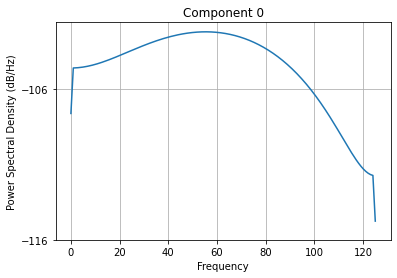

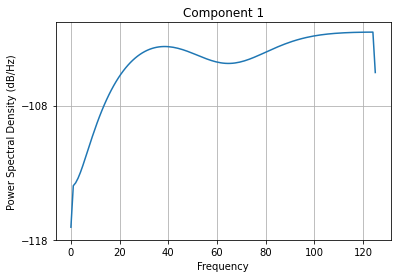

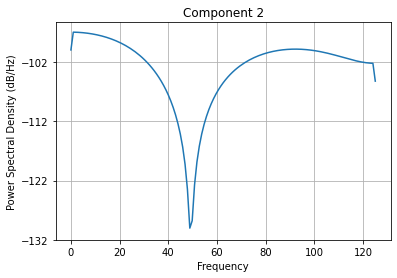

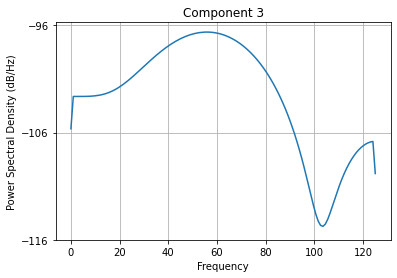

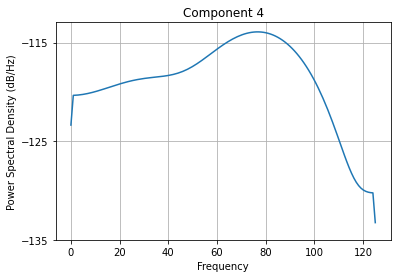

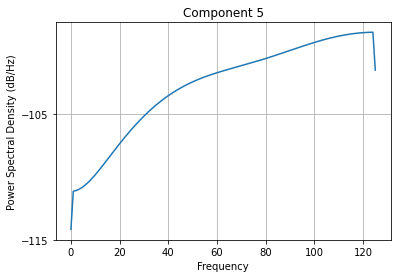

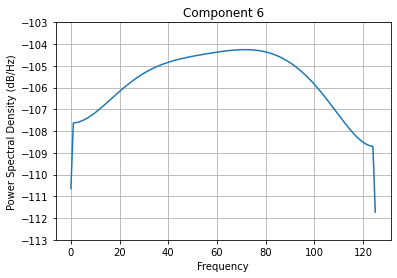

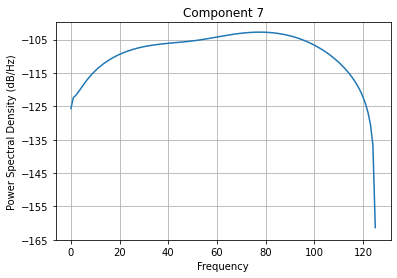

In [125]:
import matplotlib.pyplot as plt

for i in range(8):
    plt.psd(ica.components_[i], Fs=Fs)
    plt.title('Component {}'.format(i))
    plt.show()

In [127]:
data = eeg_np
blink_components = [2,4,6]  # Replace with the indices of the blink components
filtered_data = data - np.dot(ica.transform(data)[:, blink_components], ica.components_[blink_components, :])

In [128]:
filtered_data.shape

(1250, 8)

In [147]:
blink_idx = [4]  #3
S = ica.transform(eeg_np)
S[:, blink_idx] = 0
eeg_filtered = ica.inverse_transform(S)

(100.0, 200.0)

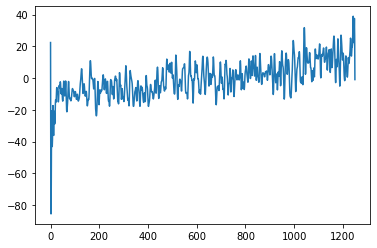

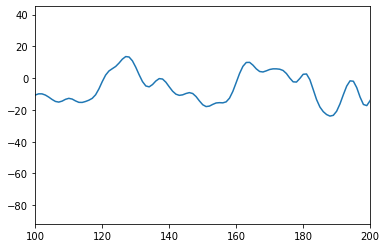

In [152]:
plt.plot(eeg_np[:,1])
plt.figure()
plt.plot(eeg_filtered[:,1]);
plt.xlim(100,200)